In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
heart = pd.read_csv('heart.csv')

## Heart disease data set attribute information

> 1. age 
> 2. sex (1= male; 0=female)
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (thallium heart scan or stress test)

In [83]:
#renaming columns so things make sense to my brain
heart = heart.rename(columns={"cp": "chest_pain", "trestbps": "blood_pressure", "fbs": "blood_sugar", "ca": "vessels", "chol": "cholesterol"})

In [136]:
heart['health_status'] = heart['target']

In [152]:
heart['health_status'] = ["healthy" if x == 0 else "sick" for x in heart['health_status']]

In [161]:
heart['gender'] = heart['sex']

In [162]:
heart['gender'] = ['F' if x == 0 else 'M' for x in heart['gender']]

In [205]:
heart.head()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,sick,M
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,sick,M
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,sick,F
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,sick,M
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,sick,F


In [82]:
heart.tail()

,age,sex,chest_pain,blood_pressure,chol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [85]:
heart.shape

(303, 14)

In [206]:
heart.describe()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [154]:
heart['health_status'].value_counts()

sick       165
healthy    138
Name: health_status, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a479796a0>,
      dtype=object)

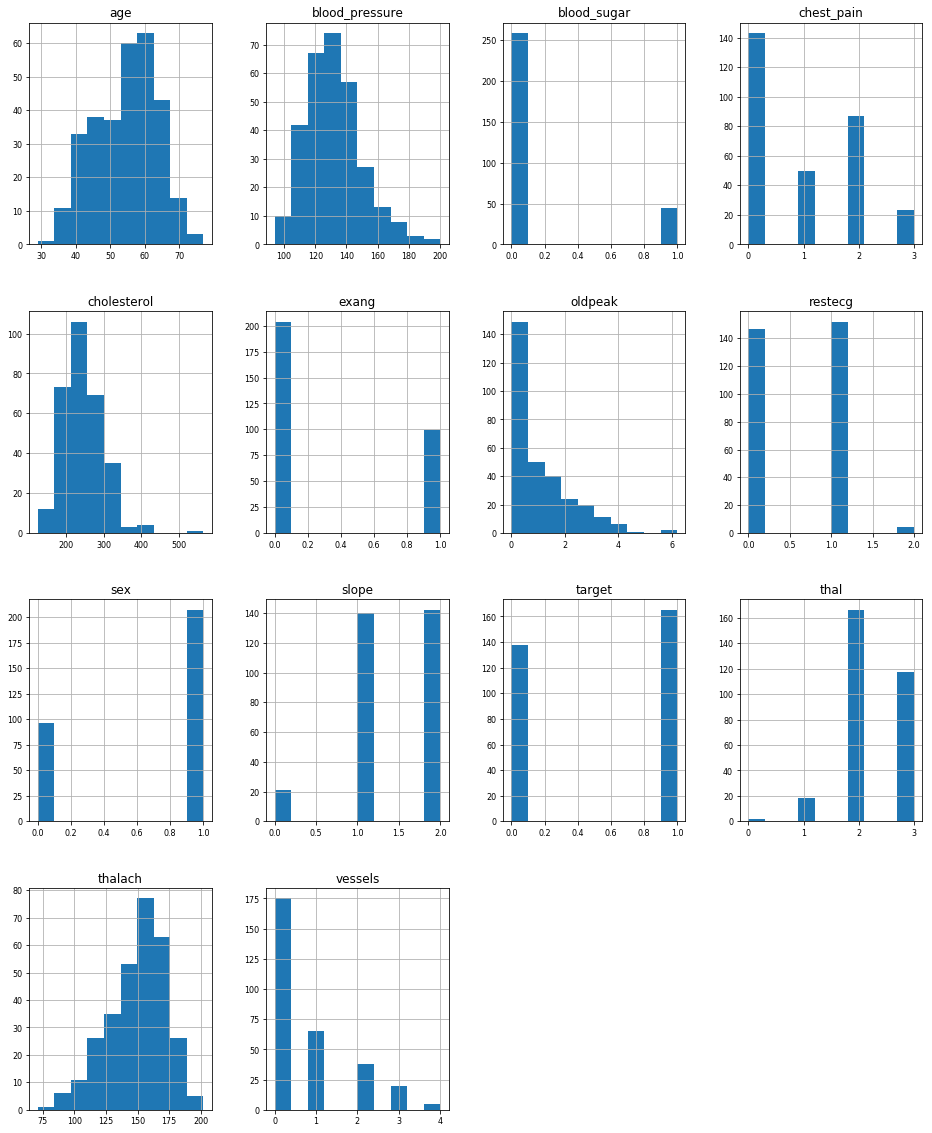

In [224]:
#Getting an overview of the distribtion of each column

#heart.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# add bins ^^^

heart.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

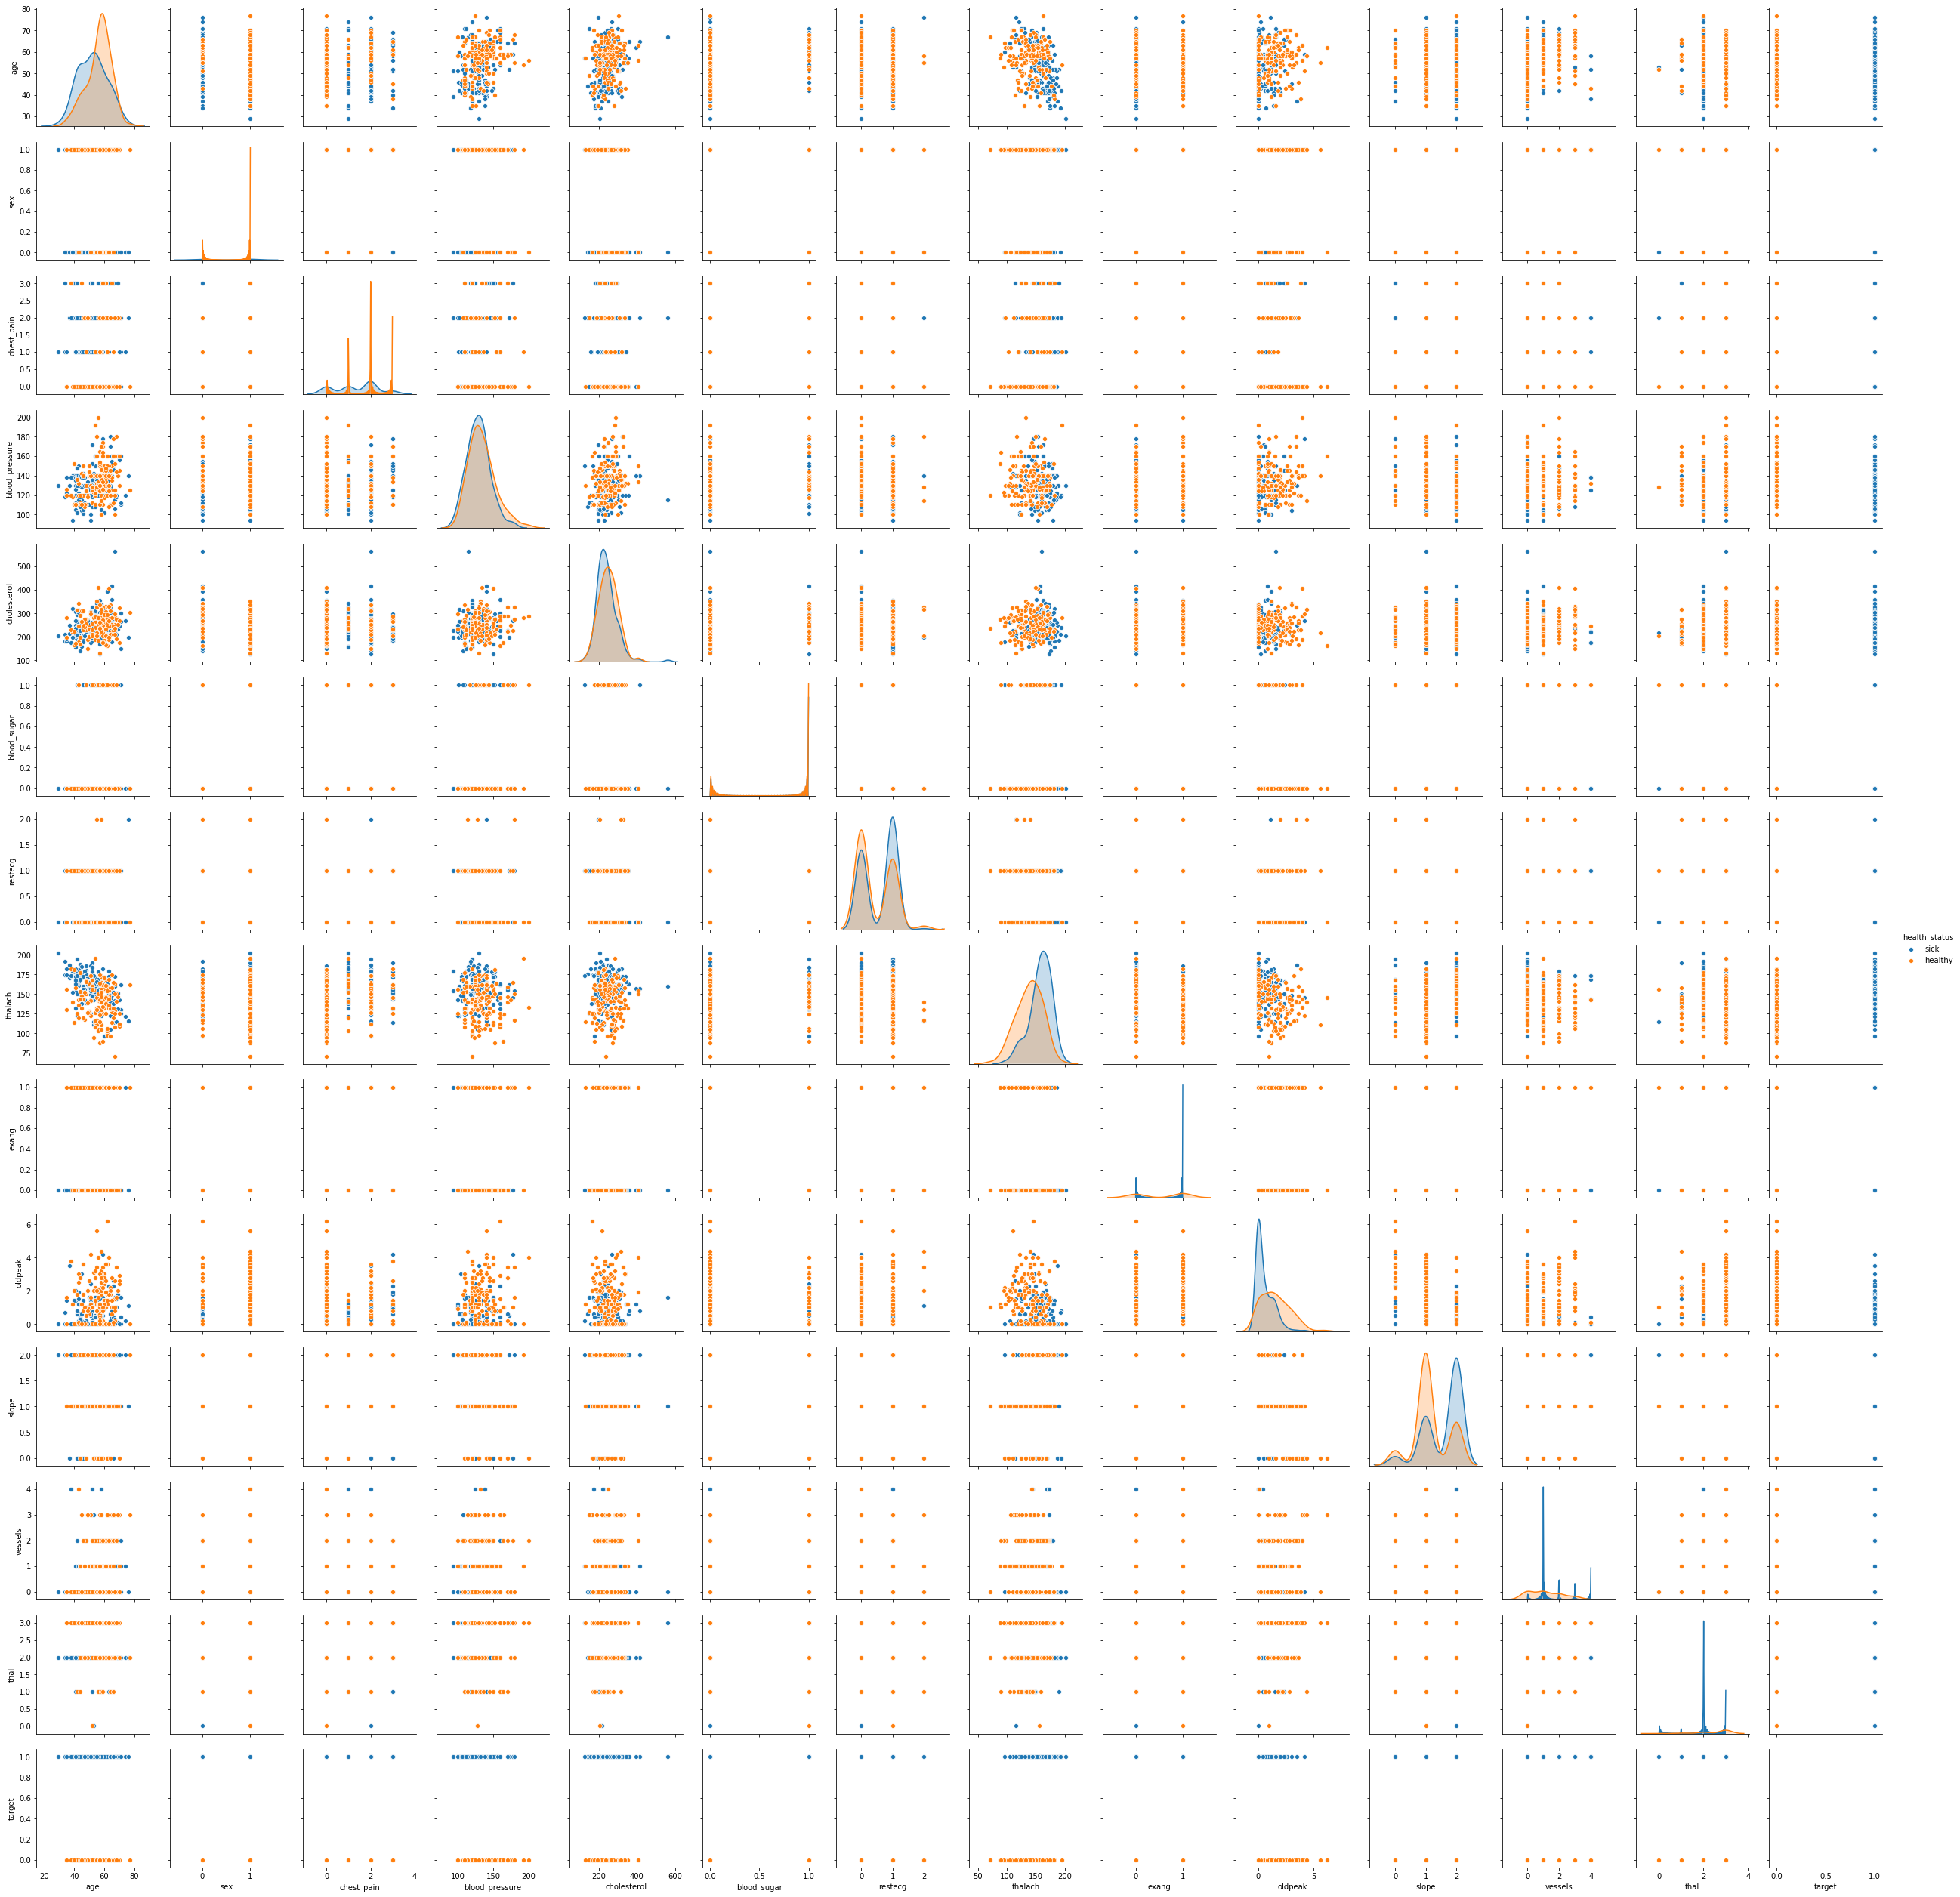

In [244]:
sns.pairplot(heart, hue='health_status')

In [156]:
heart.groupby('health_status')['age', 'sex', 'chest_pain', 'blood_pressure', 'cholesterol',
       'blood_sugar', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'vessels', 'thal'].mean()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal
health_status,,,,,,,,,,,,,
healthy,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
sick,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [258]:
#There are twice as many men in the data set 
heart['gender'].value_counts()

M    207
F     96
Name: gender, dtype: int64

In [170]:
#Checking out the distribution of heart disease between men and women
heart.groupby(['gender', 'health_status'])['gender'].count()

gender  health_status
F       healthy           24
        sick              72
M       healthy          114
        sick              93
Name: gender, dtype: int64

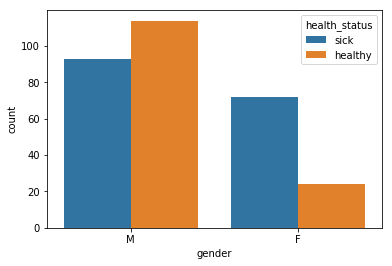

In [171]:
#Checking out the distribution of heart disease between men and women -- plot version
sns.countplot(data=heart, x='gender', hue='health_status')

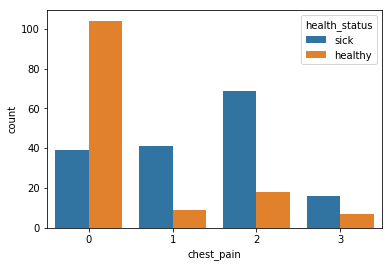

In [173]:
#Checking out the distribution of heart disease between categories of chest pain
#It seems like category 0 might be correlated with the absence of heart disease
sns.countplot(data=heart, x='chest_pain', hue='health_status')

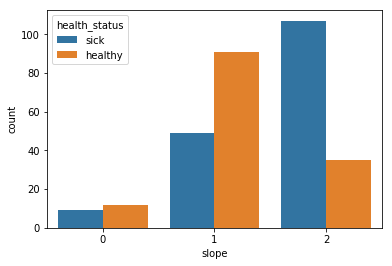

In [174]:
#Checking out the distribution of heart disease between categories of slope
#It seems like category 2 might be correlated with heart disease
sns.countplot(data=heart, x='slope', hue='health_status')

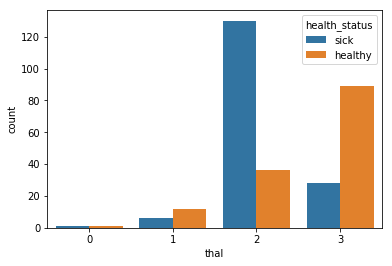

In [175]:
#Checking out the distribution of heart disease between categories of thal
#It seems like category 2 might be correlated with heart disease
sns.countplot(data=heart, x='thal', hue='health_status')

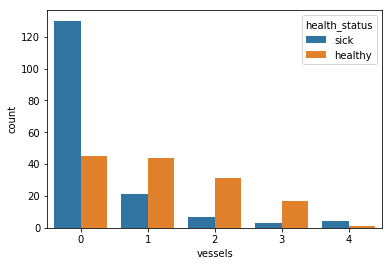

In [176]:
#Checking out the distribution of heart disease between number of heart vessels colored by flourosopy
#It seems like 0 vessels colored might be correlated with heart disease, which is confusing to me...
sns.countplot(data=heart, x='vessels', hue='health_status')

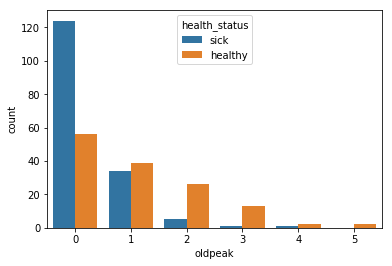

In [204]:
#Checking out the distribution of heart disease with oldpeak levels (binned)
#It seems like 0-1 range might be correlated with heart disease
#Very similar distribution to vessels above

#bin oldpeak with pd.cut

sns.countplot(data=heart, x=pd.cut(heart['oldpeak'], 6, labels=[0,1,2,3,4,5]), hue='health_status')

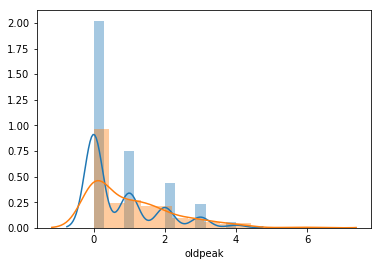

In [212]:
sns.distplot(heart['vessels'])
sns.distplot(heart['oldpeak'])

In [34]:
heart['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [35]:
heart['age'].mean()

54.366336633663366

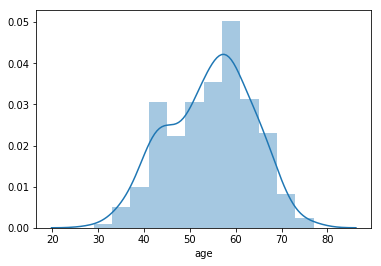

In [36]:
sns.distplot(heart['age'])

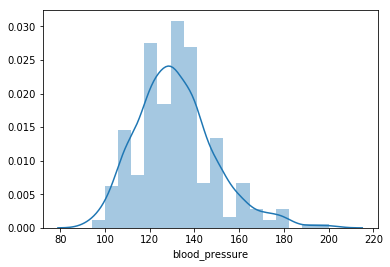

In [99]:
sns.distplot(heart['blood_pressure'])

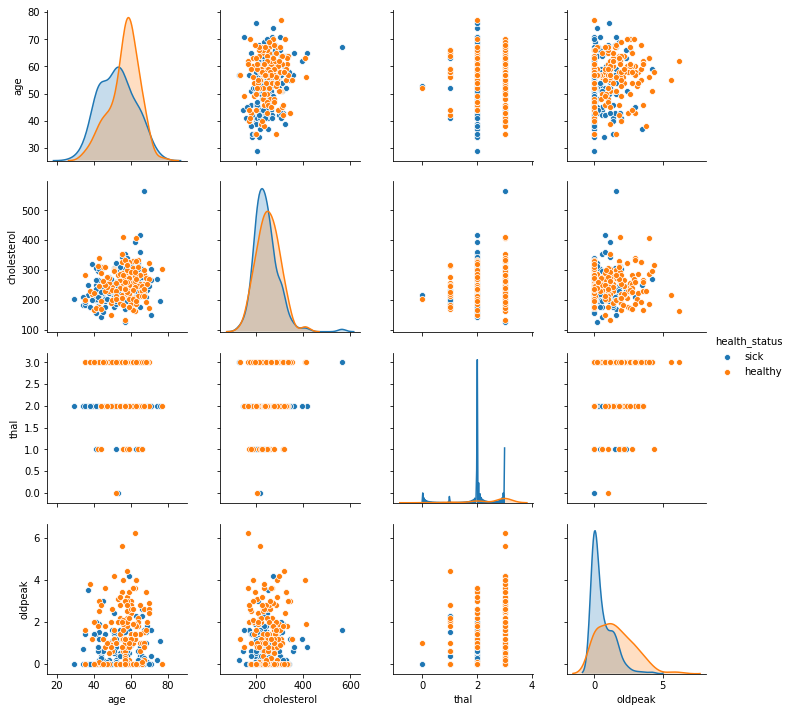

In [253]:
sns.pairplot(heart , vars = ['age', 'cholesterol', 'thal', 'oldpeak'], hue='health_status')

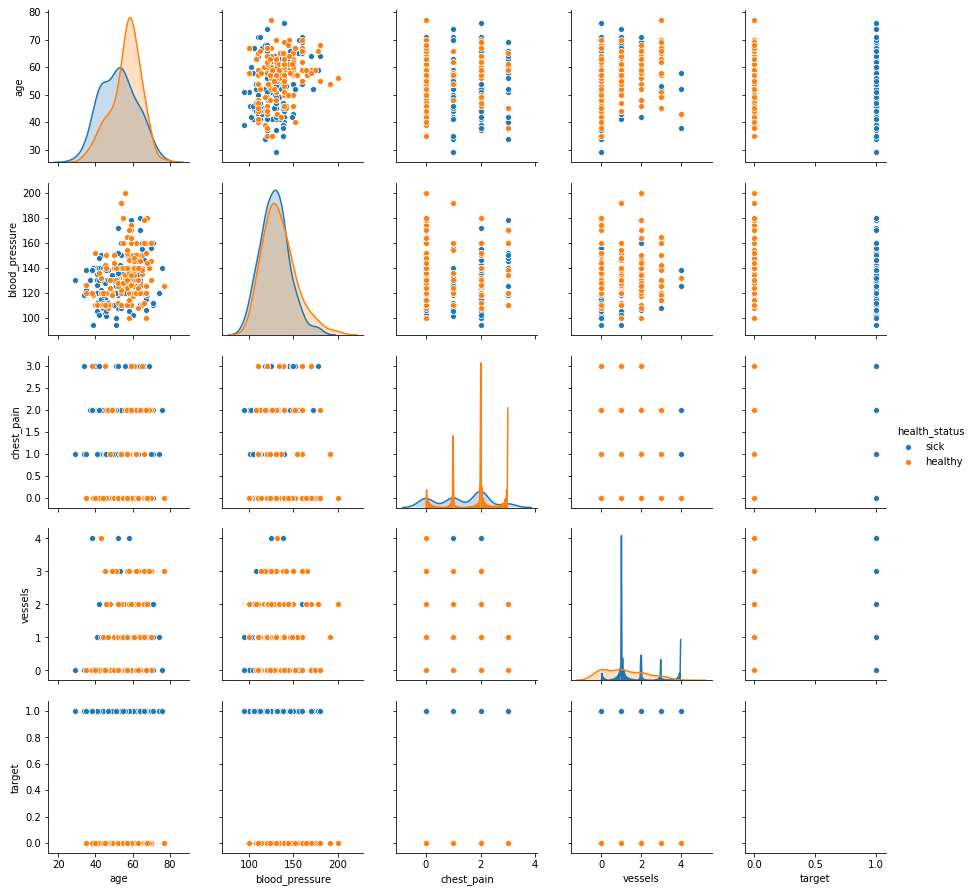

In [241]:
sns.pairplot(heart , vars = ['age', 'blood_pressure', 'chest_pain', 'vessels', 'target'], hue='health_status')

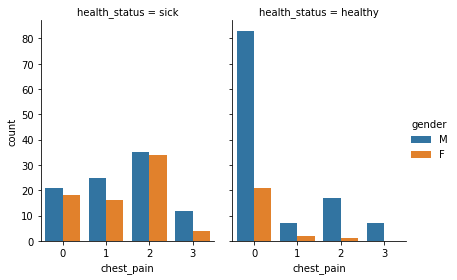

In [172]:
sns.catplot(x="chest_pain", hue="gender", col="health_status", data=heart, kind="count",
              height=4, aspect=.7);

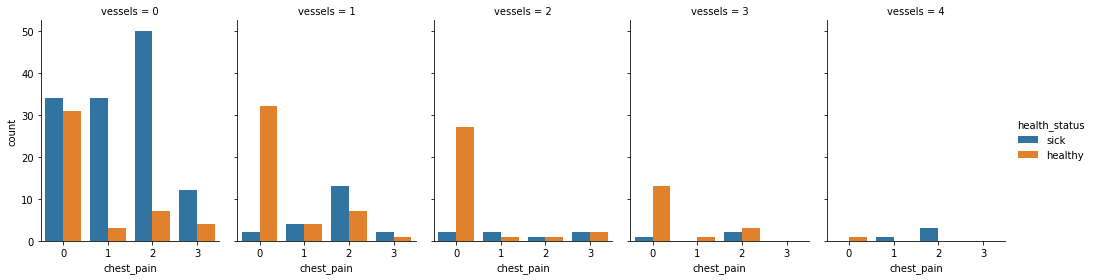

In [229]:
sns.catplot(x="chest_pain", hue="health_status", col="vessels", data=heart, kind="count",
              height=4, aspect=.7);

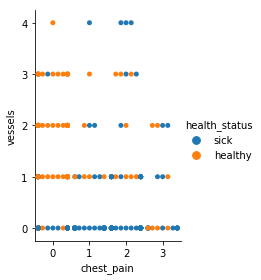

In [239]:
sns.catplot(x="chest_pain", y= "vessels", hue="health_status", data=heart, kind='swarm',
              height=4, aspect=.7);

/Users/melaniewalsh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


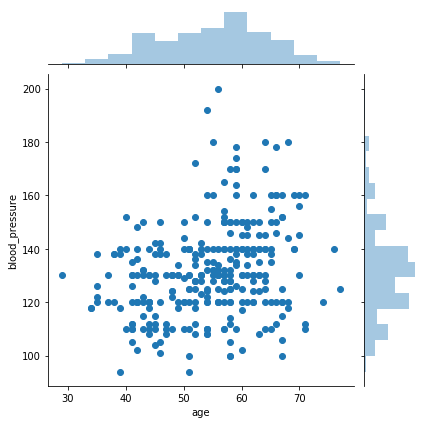

In [222]:
sns.jointplot(data=heart, x='age', y='blood_pressure')

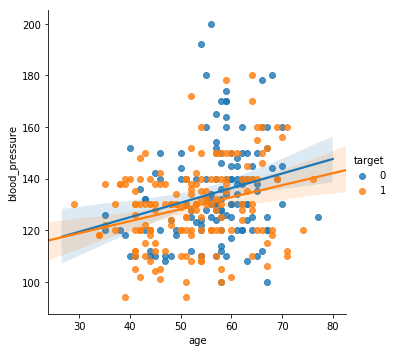

In [127]:
sns.lmplot(data=heart, x='age', y='blood_pressure', hue='target')